In [1]:
%matplotlib inline
from pyedflib import highlevel
import os
import numpy as np
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, BatchNormalization, MaxPooling1D, Conv2D, MaxPool2D
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.python.client import device_lib
from IPython.display import SVG
from keras.utils import model_to_dot, plot_model
import pydot as pyd
# import seaborn as sns
from keras.regularizers import l2

keras.utils.vis_utils.pydot = pyd

print(device_lib.list_local_devices())

Using TensorFlow backend.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 407858669098785533
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16773768190986112356
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9590916124371349000
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
data = np.load('./data/anntd_data.npy')
print(data.shape)

(1307, 64, 15000)


In [3]:
data = data[0:1300,:,:] #set aside last 7, samples might use them for testing
print(data.shape)

(1300, 64, 15000)


In [4]:
X = data[:,:,1:15000]
y = data[:,:,0]
print(X.shape)
# print(y.shape)
y = y[:,0]
print(y.shape)

(1300, 64, 14999)
(1300,)


In [5]:
inputs = X
targets = to_categorical(y)
batch_size = 32
no_epochs = 10
no_classes = 7
# validation_split = 0.2
num_folds = 10
verbosity = 1

In [6]:
print(targets)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [37]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

------------------------------------------------------------------------
Training for fold 1/10 ...
Epoch 1/10
1170/1170 [==============================] - 11s 10ms/step - loss: 6.2117 - accuracy: 0.2556
Epoch 2/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.6030 - accuracy: 0.4222
Epoch 3/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.3520 - accuracy: 0.4658
Epoch 4/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.2012 - accuracy: 0.5265
Epoch 5/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.2277 - accuracy: 0.5547
Epoch 6/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.1252 - accuracy: 0.5838
Epoch 7/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.2328 - accuracy: 0.5667
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1406 - accuracy: 0.5906
Epoch 9/10
1170/1170 [==============================] - 11s 10ms/ste

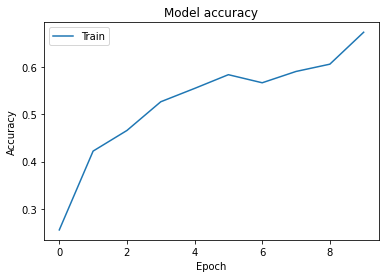

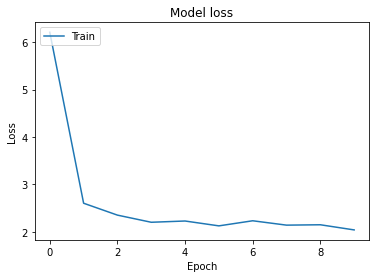

------------------------------------------------------------------------
Training for fold 2/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 6.3359 - accuracy: 0.2590
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.5243 - accuracy: 0.4282
Epoch 3/10
1170/1170 [==============================] - 11s 10ms/step - loss: 2.5593 - accuracy: 0.4521
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1905 - accuracy: 0.5632
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2479 - accuracy: 0.5530
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1705 - accuracy: 0.5940
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2544 - accuracy: 0.5915
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1994 - accuracy: 0.5778
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

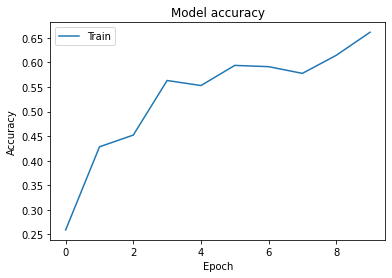

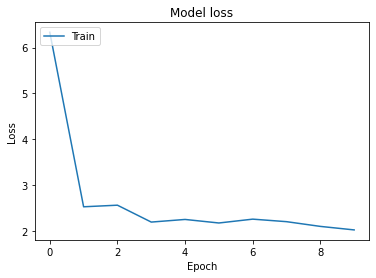

------------------------------------------------------------------------
Training for fold 3/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 6.1613 - accuracy: 0.2590
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.4182 - accuracy: 0.4667
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2429 - accuracy: 0.5017
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3129 - accuracy: 0.5444
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.0869 - accuracy: 0.5718
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1543 - accuracy: 0.5940
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.0830 - accuracy: 0.6265
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1394 - accuracy: 0.6342
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

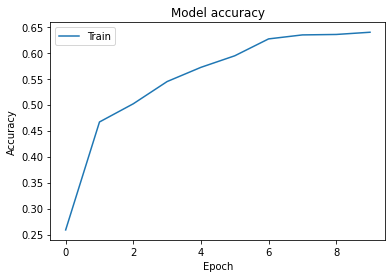

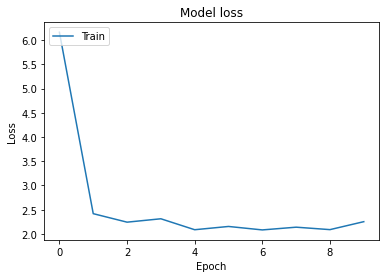

------------------------------------------------------------------------
Training for fold 4/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 5.9271 - accuracy: 0.2624
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.4327 - accuracy: 0.4350
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3738 - accuracy: 0.5128
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1434 - accuracy: 0.5368
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2090 - accuracy: 0.5496
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3340 - accuracy: 0.5538
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.0291 - accuracy: 0.6197
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2642 - accuracy: 0.5991
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

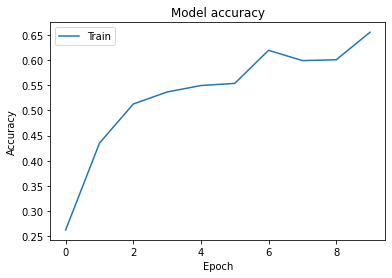

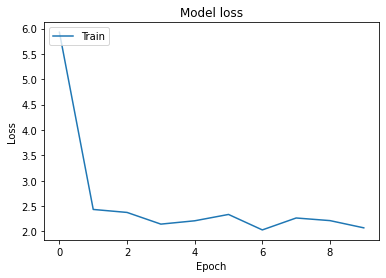

------------------------------------------------------------------------
Training for fold 5/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 5.9532 - accuracy: 0.2496
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3814 - accuracy: 0.4128
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1901 - accuracy: 0.4812
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1068 - accuracy: 0.5274
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1362 - accuracy: 0.5581
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.0787 - accuracy: 0.5821
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1642 - accuracy: 0.5863
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1019 - accuracy: 0.5726
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

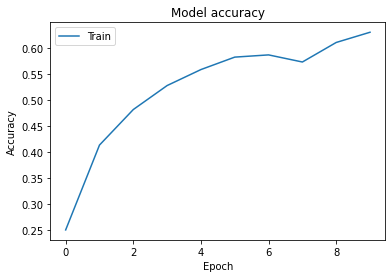

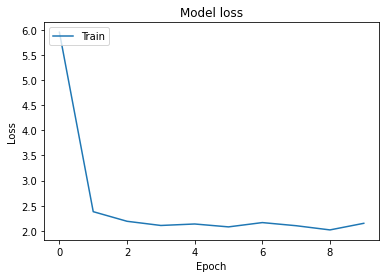

------------------------------------------------------------------------
Training for fold 6/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 6.3546 - accuracy: 0.2419
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.5228 - accuracy: 0.4436
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1433 - accuracy: 0.5120
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2178 - accuracy: 0.5624
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2067 - accuracy: 0.5667
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.0990 - accuracy: 0.6308
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1892 - accuracy: 0.6145
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1331 - accuracy: 0.6205
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

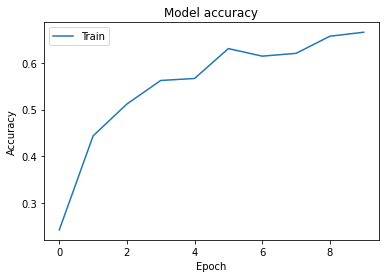

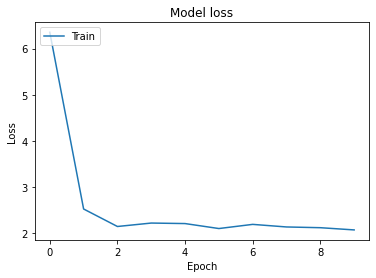

------------------------------------------------------------------------
Training for fold 7/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 6.0596 - accuracy: 0.2598
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.5003 - accuracy: 0.4624
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3139 - accuracy: 0.4838
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2266 - accuracy: 0.5632
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.0835 - accuracy: 0.5897
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1275 - accuracy: 0.5821
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3306 - accuracy: 0.5940
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1596 - accuracy: 0.6359
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

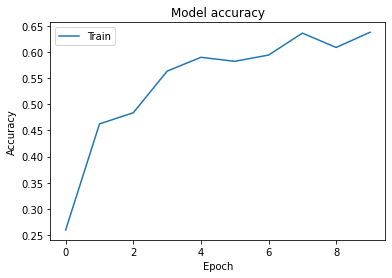

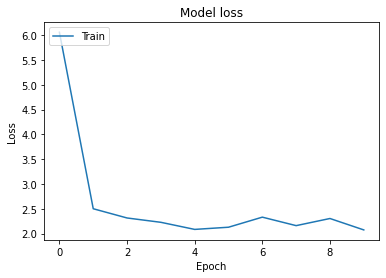

------------------------------------------------------------------------
Training for fold 8/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 6.2608 - accuracy: 0.2538
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.4715 - accuracy: 0.4513
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3931 - accuracy: 0.4889
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2191 - accuracy: 0.5504
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2550 - accuracy: 0.5650
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2976 - accuracy: 0.5855
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2910 - accuracy: 0.6085
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2111 - accuracy: 0.6179
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

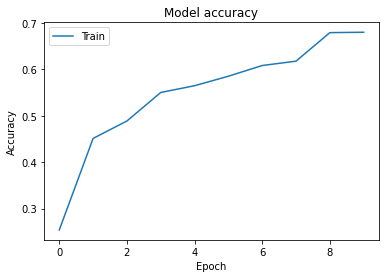

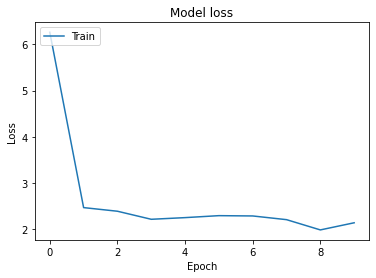

------------------------------------------------------------------------
Training for fold 9/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 10ms/step - loss: 6.2904 - accuracy: 0.2607
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.5754 - accuracy: 0.4214
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2345 - accuracy: 0.4991
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3254 - accuracy: 0.5128
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2303 - accuracy: 0.5803
Epoch 6/10
1170/1170 [==============================] - 13s 11ms/step - loss: 2.1379 - accuracy: 0.6137
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1626 - accuracy: 0.6282
Epoch 8/10
1170/1170 [==============================] - 14s 12ms/step - loss: 2.3120 - accuracy: 0.5949
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/ste

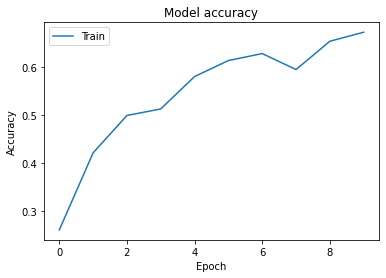

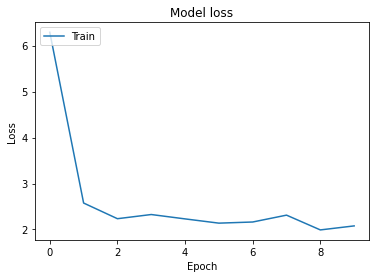

------------------------------------------------------------------------
Training for fold 10/10 ...
Epoch 1/10
1170/1170 [==============================] - 12s 11ms/step - loss: 6.4197 - accuracy: 0.2590
Epoch 2/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.6830 - accuracy: 0.4316
Epoch 3/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3019 - accuracy: 0.4838
Epoch 4/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.3296 - accuracy: 0.5274
Epoch 5/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.2293 - accuracy: 0.5709
Epoch 6/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1987 - accuracy: 0.5744
Epoch 7/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1852 - accuracy: 0.6026
Epoch 8/10
1170/1170 [==============================] - 12s 10ms/step - loss: 2.1394 - accuracy: 0.6265
Epoch 9/10
1170/1170 [==============================] - 12s 10ms/st

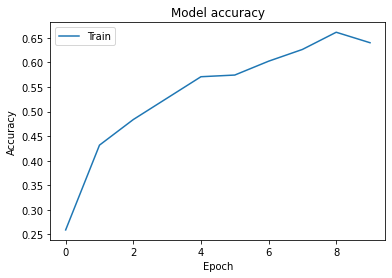

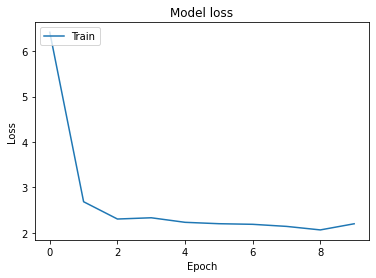

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.9583722481360804 - Accuracy: 30.769231915473938%
------------------------------------------------------------------------
> Fold 2 - Loss: 2.856355061897865 - Accuracy: 41.53846204280853%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.848720887991098 - Accuracy: 24.61538463830948%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.108997763120211 - Accuracy: 26.923078298568726%
------------------------------------------------------------------------
> Fold 5 - Loss: 2.840882338010348 - Accuracy: 30.769231915473938%
------------------------------------------------------------------------
> Fold 6 - Loss: 3.261169206179105 - Accuracy: 23.076923191547394%
------------------------------------------------------------------------


In [38]:
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=2,activation='relu',kernel_regularizer=l2(0.2), input_shape=(64, 14999)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(600, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])

   # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no}/{num_folds} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                        epochs=no_epochs, batch_size=batch_size, shuffle=True)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(
        f'Score for fold {fold_no}/{num_folds}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    # plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig(f'./results/acc_fold_{fold_no}.png')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig(f'./results/loss_fold_{fold_no}')
    plt.show()

    # Increment fold number
    fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [20]:
# model.save("16filt_conv1_batchnorm_32btchs_10fold_10ep_hos_l2reg.h5")

In [7]:
# model.save("16filt_conv1_batchnorm_32btchs_10fold.h5")

In [43]:
# Prediction
# model = keras.models.load_model("16filt_conv1_batchnorm_32btchs_10fold_10ep_hos.h5")
# model = keras.models.load_model("16filt_conv1_batchnorm_32btchs_10fold_10ep_hos_l2reg.h5")
dat = np.load('./data/anntd_data.npy')

train_data = dat[0:1300,:,:]
test_data = dat[1300:1307,:,:]
print(train_data.shape)
print(test_data.shape)
# X = data[:,:,1:15000]
# y = data[:,:,0]
X_test = test_data[:,:,1:15000]
y_test = test_data[:,:,0]

X_train = train_data[:,:,1:15000]
y_train = train_data[:,:,0]
# X_test = X_test.reshape(X_test.shape[0], 64, 14999, 1)
# X_train = np.load("X_train.npy")

# y_test = np.load("y_test.npy")
# y_train = np.load("y_train.npy")
yhat_train = model.predict(X_train)
y = y_train
y_col = y[:,0]
print("On training data:")
print(yhat_train)
print(y_col)
y_train_cat = to_categorical(y_col)

# print("On testing: ")
yhat_test = model.predict(X_test)
y = y_test
y_col = y[:,0]
print("On testing data:")
print(yhat_test)
print(y_col)
# rounded_yhat = np.around(yhat)
y_test_cat = to_categorical(y_col)


(1300, 64, 15000)
(7, 64, 15000)
On training data:
[[1.56243797e-04 1.04369654e-04 3.49056703e-04 ... 3.76638442e-01
  2.06003442e-01 8.67324546e-02]
 [6.91426831e-05 1.30077737e-04 4.58704046e-04 ... 5.01178861e-01
  6.58853427e-02 4.19816434e-01]
 [9.94699149e-05 5.71377168e-04 7.22261204e-04 ... 4.60425280e-02
  1.08248070e-01 4.46847379e-02]
 ...
 [1.53642973e-12 1.39954581e-09 5.65303218e-08 ... 9.83067811e-01
  1.57121494e-02 1.80363626e-04]
 [3.38339049e-07 3.19712526e-05 5.45928960e-05 ... 1.64119139e-01
  2.49543086e-01 5.61869144e-01]
 [2.01605266e-09 2.83025940e-07 1.60191814e-06 ... 2.67867167e-02
  9.47518945e-01 3.25609022e-03]]
[5. 4. 3. ... 4. 6. 5.]
On testing data:
[[1.0235589e-10 5.2579850e-08 6.8826616e-06 1.5278842e-03 1.2534183e-01
  8.5813794e-03 8.6454195e-01]
 [1.4426224e-08 3.0397705e-06 6.2658628e-06 2.0440683e-02 2.1078280e-01
  4.7361520e-01 2.9515201e-01]
 [1.8107965e-13 3.9801756e-10 1.3099104e-08 3.1756603e-03 2.0109044e-01
  7.8462648e-01 1.1107466e-02]

[4. 4. 6. 5.]


Confusition matrix, without normalization
[[0 2 0 0]
 [0 0 1 1]
 [0 1 1 0]
 [0 0 1 0]]


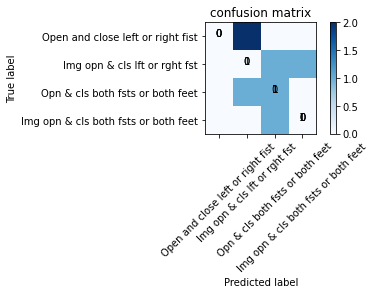

In [44]:
# y_test_cat = to_categorical(y_col)
# print(yhat)
cm = confusion_matrix(y_test_cat.argmax(axis=1), yhat_test.argmax(axis=1))
cm_plot_labels = ['Open and close left or right fist', 'Img opn & cls lft or rght fst', 'Opn & cls both fsts or both feet', 'Img opn & cls both fsts or both feet']
plot_confusion_matrix(cm, cm_plot_labels, title="confusion matrix")

Confusition matrix, without normalization
[[230  32  46  17]
 [ 14 266  27  18]
 [ 17  13 277  17]
 [ 11  25  43 247]]


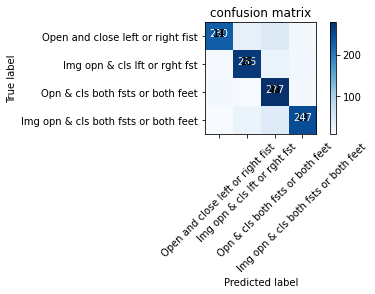

In [46]:
# y_train_cat = to_categorical(y_col)
# print(yhat)
cm = confusion_matrix(y_train_cat.argmax(axis=1), yhat_train.argmax(axis=1))
cm_plot_labels = ['Open and close left or right fist', 'Img opn & cls lft or rght fst', 'Opn & cls both fsts or both feet', 'Img opn & cls both fsts or both feet']
plot_confusion_matrix(cm, cm_plot_labels, title="confusion matrix")

In [45]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confution matrix")
    else:
        print("Confusition matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, j, cm[i, j], horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('./results/confusion_train.png')

In [47]:
model1 = keras.models.load_model("./models/16filt_conv1_batchnorm_32btchs_10fold.h5")
print(model1)

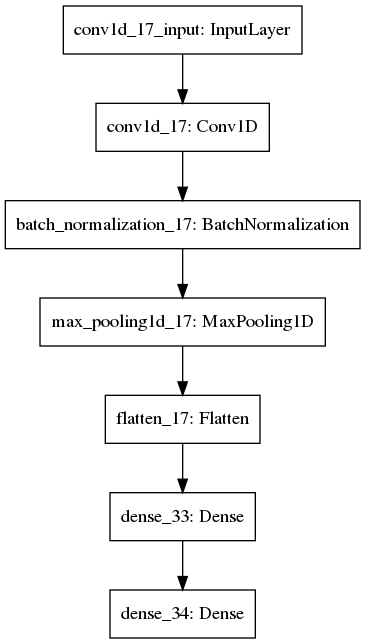

In [19]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model.png')